In [133]:
import pandas  as pd
import numbers as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [214]:
df_price_house = pd.read_csv("house_price_Dong-Da__subdata.csv")

In [215]:
df_price_house.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [216]:
df_price_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [217]:
df_price_house.describe()

,area,price,postDate,toilet,bedroom,floor,lat,long
count,665.000000,6.170000e+02,671.000000,240.000000,320.00000,366.000000,671.000000,671.000000
mean,103.763534,2.892758e+04,44259.903130,3.645833,4.31875,4.762295,21.015733,105.825550
std,471.861867,1.464474e+05,58.280392,2.349126,2.58976,1.676853,0.006517,0.009011
min,0.000000,4.500000e+00,44197.000000,1.000000,1.00000,1.000000,20.998499,105.795544
25%,39.000000,3.950000e+03,44197.000000,2.000000,3.00000,4.000000,21.011094,105.822605
50%,55.000000,8.900000e+03,44292.000000,4.000000,4.00000,5.000000,21.018072,105.828985
75%,80.000000,2.150000e+04,44312.000000,4.250000,6.00000,5.000000,21.018777,105.829949
max,11000.000000,3.300000e+06,44325.000000,16.000000,22.00000,11.000000,21.036845,105.841407


In [218]:
df_price_house.isna()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
666,False,False,False,True,True,True,False,False,False,False,False,False
667,False,False,False,False,True,True,True,False,False,False,False,False
668,False,False,False,True,True,True,True,True,True,False,False,False
669,False,False,False,True,True,True,True,True,True,False,False,False


In [219]:
df_price_house.dropna(subset='price')

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho


In [220]:
df_price_house

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho


In [158]:
#Thay thế giá trị Không có thông tin cho cột nan ở cột land_certificate
df_price_house['land_certificate'].fillna("không có thông tin", inplace=True)


In [159]:
#Thay thế giá trị mode() cột house_direction cho các giá trị nan của cột house_direction
df_price_house['house_direction'].fillna((df_price_house['house_direction'].mode().iloc[0]), inplace=True)

In [160]:
df_price_house['balcony_direction'].fillna(df_price_house['balcony_direction'].mode().iloc[0], inplace=True)

In [161]:
df_price_house['toilet'].fillna(df_price_house['toilet'].mode().iloc[0], inplace=True)


In [162]:
df_price_house['bedroom'].fillna(df_price_house['bedroom'].mode().iloc[0], inplace=True)

In [163]:
df_price_house['floor'].fillna(df_price_house['floor'].mode().iloc[0], inplace=True)

In [164]:
# Lọc dữ liệu nhà ngõ
df_price_house_ngo = df_price_house[(df_price_house['property_type']=='trong ngo')]

In [177]:
df_price_house_ngo['giá/m2'] = df_price_house_ngo['price']/df_price_house_ngo['area']


C:\Users\vcn001-cl\AppData\Local\Temp\ipykernel_348\1763367996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_house_ngo['giá/m2'] = df_price_house_ngo['price']/df_price_house_ngo['area']


In [176]:
df_price_house = df_price_house.sample(10)
df_price_house

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,giá/m2
40,70.0,3200.0,44197,So do,dong-Nam,dong-Nam,2.0,4.0,5.0,21.009739,105.824782,trong ngo,45.714286
69,52.0,1500.0,44197,So do,dong-Nam,dong-Nam,1.0,2.0,5.0,21.020312,105.808328,trong ngo,28.846154
73,51.0,6100.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.018072,105.829949,trong ngo,119.607843
99,0.0,3200.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.018072,105.829949,trong ngo,inf
35,50.0,3500.0,44197,So do,dong-Nam,dong-Nam,1.0,1.0,5.0,21.012988,105.820012,trong ngo,70.000000
51,77.0,1950.0,44197,So do,dong-Nam,dong-Nam,2.0,2.0,5.0,21.001275,105.839304,trong ngo,25.324675
85,0.0,3600.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.018072,105.829949,trong ngo,inf
61,42.0,1450.0,44197,So do,dong-Nam,dong-Nam,1.0,2.0,5.0,21.017006,105.815086,trong ngo,34.523810
8,75.0,1800.0,44197,So do,dong-Nam,dong-Nam,2.0,2.0,5.0,21.022578,105.831854,trong ngo,24.000000
79,90.0,15500.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.018072,105.829949,trong ngo,172.222222


In [178]:
Q1_area = df_price_house_ngo['area'].quantile(0.25)
Q3_area = df_price_house_ngo['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area
lower_area = Q1_area - 1.5*IQR_area
upper_area = Q3_area + 1.5*IQR_area
IQR_area

27.75

In [179]:
Q1_gia = df_price_house_ngo['giá/m2'].quantile(0.25)
Q3_gia = df_price_house_ngo['giá/m2'].quantile(0.75)
IQR_gia = Q3_gia - Q1_gia
lower_gia = Q1_gia - 1.5*IQR_gia
upper_gia = Q3_gia + 1.5*IQR_gia

In [180]:
#Lọc bỏ giá có giá trị ngoại lai
df_price_house_outlier_gia = df_price_house_ngo[~(df_price_house_ngo['giá/m2']>lower_gia) | (df_price_house_ngo['giá/m2']<upper_gia)]
df_price_house_outlier_gia

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,giá/m2
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.000000
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73.684211
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.419355
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111.538462
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,25.0,2850.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,2.0,4.0,21.029522,105.827353,trong ngo,114.000000
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272.413793
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106.250000
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102.631579


In [181]:
df_price_house_outlier = df_price_house_outlier_gia[~(df_price_house_outlier_gia['area']<upper_area) | (df_price_house_outlier_gia['area']>lower_area) ]
df_price_house_outlier


,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,giá/m2
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.000000
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73.684211
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.419355
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111.538462
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,25.0,2850.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,2.0,4.0,21.029522,105.827353,trong ngo,114.000000
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272.413793
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106.250000
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102.631579


<Axes: xlabel='giá/m2', ylabel='Density'>

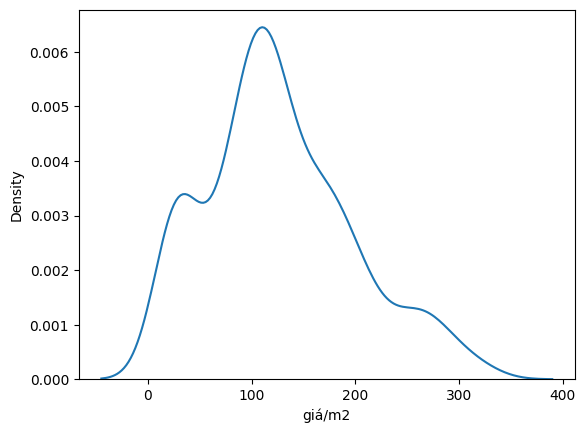

In [182]:
sns.kdeplot(df_price_house_outlier['giá/m2'])

<Axes: ylabel='giá/m2'>

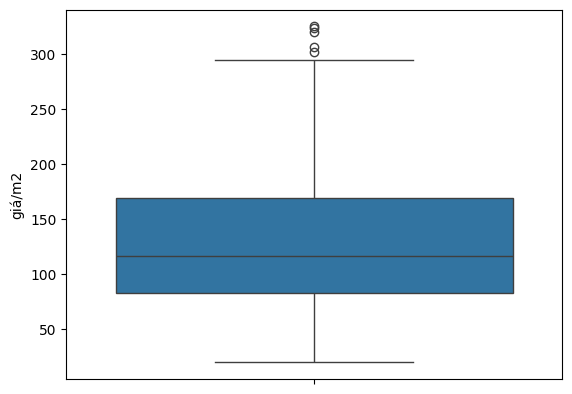

In [183]:
sns.boxplot(df_price_house_outlier['giá/m2'])

In [185]:
min_max = MinMaxScaler()
data_min_max = min_max.fit_transform(pd.DataFrame(df_price_house_outlier['giá/m2']))

<Axes: ylabel='Density'>

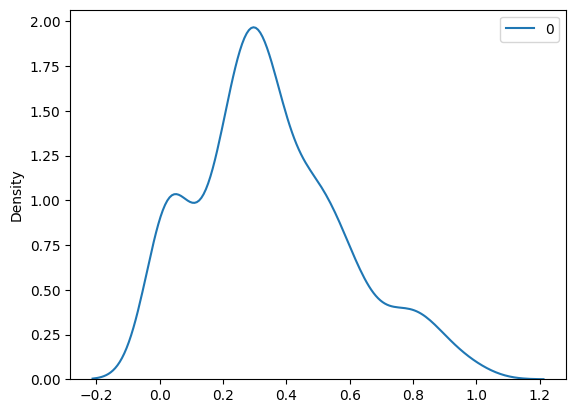

In [186]:
sns.kdeplot(data_min_max)

<Axes: >

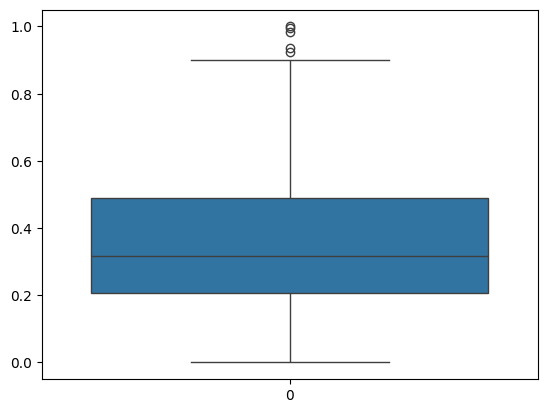

In [187]:
sns.boxplot(data_min_max)

In [188]:
zcs = StandardScaler()
data_zcs = zcs.fit_transform(pd.DataFrame(df_price_house_outlier['giá/m2']))

<Axes: ylabel='Density'>

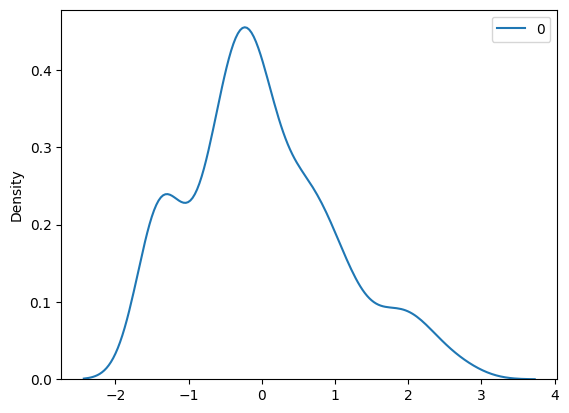

In [189]:
sns.kdeplot(data_zcs)

<Axes: >

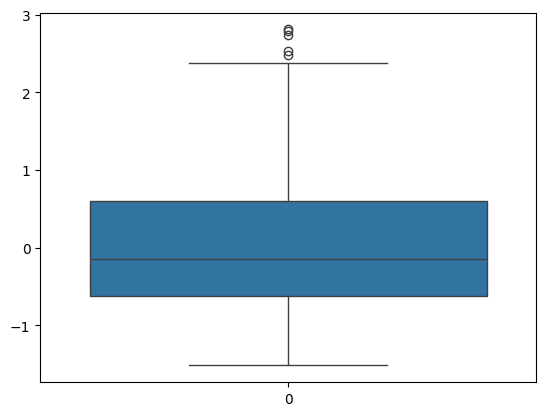

In [190]:
sns.boxplot(data_zcs)

In [194]:
rbs = RobustScaler()
data_rbs = rbs.fit_transform(pd.DataFrame(df_price_house_outlier['giá/m2']))

<Axes: ylabel='Density'>

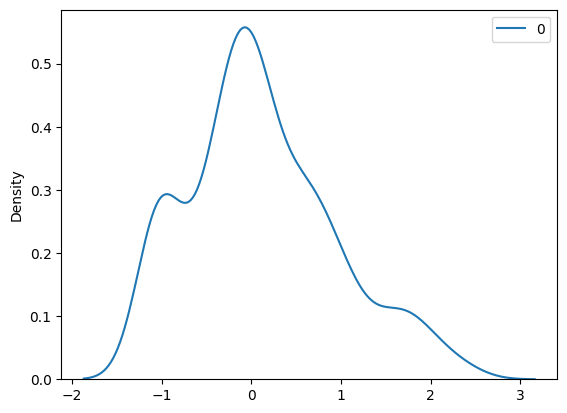

In [195]:
sns.kdeplot(data_rbs)

<Axes: >

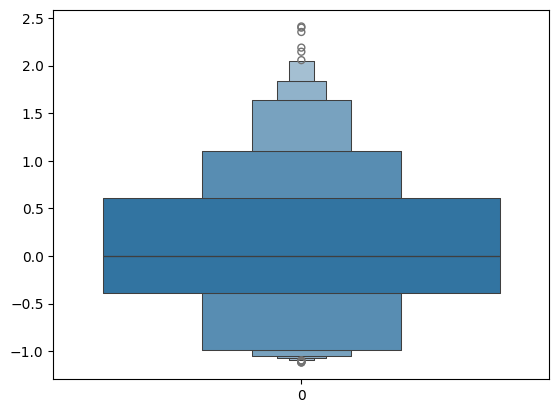

In [196]:
sns.boxenplot(data_rbs)